In [20]:
import numpy as np
import pandas as pd

In [25]:
movies = pd.read_csv('Movie_Id_Titles.csv')
rating = pd.read_csv('u.tsv', names = ['user_id', 'item_id', 'rating', 'timestamp'], sep = '\t')

In [26]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [27]:
rating.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [28]:
df = pd.merge(rating, movies, left_on = 'item_id', right_on = 'item_id', how = 'left')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [47]:
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [32]:
rating['rating_count'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


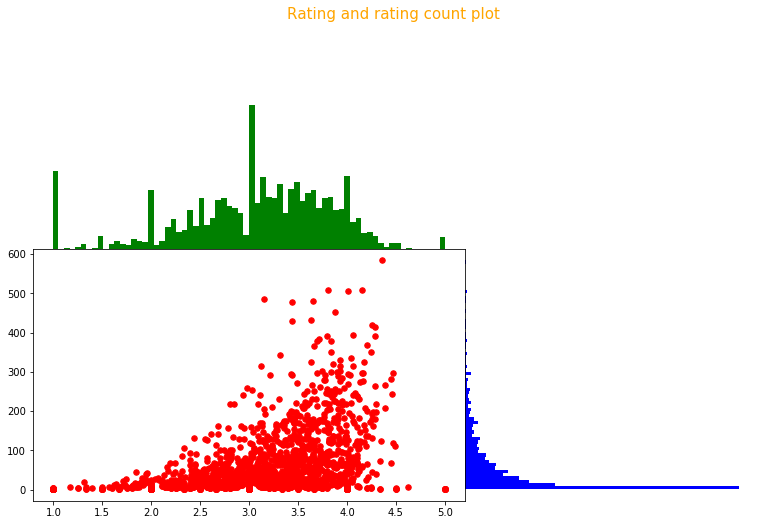

In [41]:
fig = plt.figure(figsize = (10, 7))
fig.suptitle('Rating and rating count plot', fontsize = 15, color = 'orange')

axs1 = fig.add_axes([0, 0.5, 0.6, 0.3])
axs2 = fig.add_axes([0.6, 0, 0.4, 0.5])
axs3 = fig.add_axes([0, 0, 0.6, 0.5])

axs1.axis(False)
axs2.axis(False)

axs1.hist(rating['rating'], bins = 70, color = 'green')
axs2.hist(rating['rating_count'], bins = 70, orientation = 'horizontal', color = 'blue')
axs3.scatter(rating['rating'], rating['rating_count'], s = 30, color = 'red')

In [48]:
rating.sort_values('rating_count', ascending = False).head(10)

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [49]:
starwars_rating = moviemat['Star Wars (1977)']

In [50]:
starwars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [56]:
movies_like_starwars = moviemat.corrwith(starwars_rating)
movies_like_starwars_df = pd.DataFrame(movies_like_starwars, columns = ['correlation'])
movies_like_starwars_df.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [57]:
movies_like_starwars_with_rating_count = movies_like_starwars_df.merge(rating, on = 'title')
movies_like_starwars_with_rating_count.head()

,correlation,rating,rating_count
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41


In [60]:
movies_like_starwars_with_rating_count.sort_values('correlation', ascending = False).head(10)

,correlation,rating,rating_count
title,,,
Commandments (1997),1.0,2.666667,3
Cosi (1996),1.0,4.000000,4
No Escape (1994),1.0,2.400000,5
Stripes (1981),1.0,3.800000,5
Man of the Year (1995),1.0,3.111111,9
Hollow Reed (1996),1.0,2.333333,6
"Beans of Egypt, Maine, The (1994)",1.0,3.500000,2
"Good Man in Africa, A (1994)",1.0,3.000000,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,2.600000,5


In [63]:
movies_like_starwars_high_correlated = movies_like_starwars_with_rating_count[movies_like_starwars_with_rating_count['rating_count'] > 50]
movies_like_starwars_high_correlated.sort_values('correlation', ascending = False).head(10)

,correlation,rating,rating_count
title,,,
Star Wars (1977),1.000000,4.359589,584
"Empire Strikes Back, The (1980)",0.748353,4.206522,368
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Giant (1956),0.488093,3.745098,51
"Life Less Ordinary, A (1997)",0.411638,3.075472,53
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
"Sting, The (1973)",0.367538,4.058091,241
Indiana Jones and the Last Crusade (1989),0.350107,3.930514,331


In [97]:
movies = movies_like_starwars_high_correlated.sort_values('correlation', ascending = False)[:21]
movies = movies.sort_values('correlation', ascending = True)[:-1]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text yticklabel objects>)

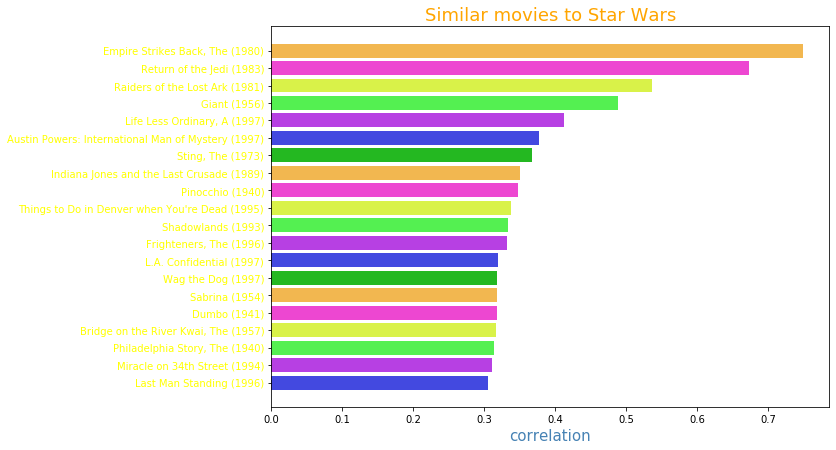

In [98]:
plt.figure(figsize = (10, 7))
plt.title('Similar movies to Star Wars', fontsize = 18, color = 'orange')
color_list = ['#4349e0', '#b740e3', '#54f051', '#d9f249', '#ed47d1', '#f2b750', '#24b821']
plt.barh(movies.index, movies['correlation'], color = color_list)
plt.xlabel('correlation', fontsize = 15, color = 'steelblue')
plt.yticks(color = 'yellow')